In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:00<00:00, 218MB/s]
100% 163M/163M [00:00<00:00, 193MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])


['with_mask_1732.jpg', 'with_mask_1352.jpg', 'with_mask_1862.jpg', 'with_mask_1534.jpg', 'with_mask_132.jpg']
['with_mask_2323.jpg', 'with_mask_2613.jpg', 'with_mask_1390.jpg', 'with_mask_2267.jpg', 'with_mask_2356.jpg']


In [8]:
without_mask_files = os.listdir ('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1392.jpg', 'without_mask_2176.jpg', 'without_mask_539.jpg', 'without_mask_2733.jpg', 'without_mask_1777.jpg']
['without_mask_3316.jpg', 'without_mask_3516.jpg', 'without_mask_2851.jpg', 'without_mask_424.jpg', 'without_mask_1371.jpg']


In [9]:
print('number of images with mask:', len(with_mask_files))
print('number of images without mask:', len(without_mask_files))

number of images with mask: 3725
number of images without mask: 3828


Creating label for the two class of images

with mask -> 1

without mask -> 0

In [10]:
# create the labels

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Joining the two labels

In [12]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**


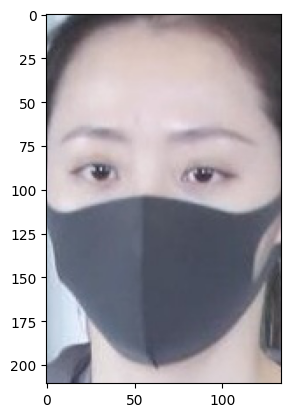

In [13]:
# displaying images with mask 
img = mpimg.imread('/content/data/with_mask/with_mask_1352.jpg')
imgplot = plt.imshow(img)
plt.show()

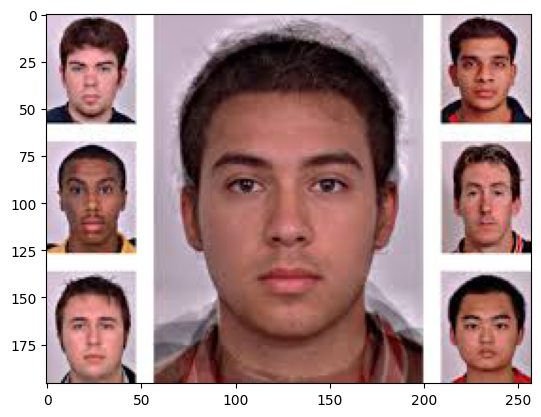

In [14]:
# displaying images without mask
img = mpimg.imread('/content/data/without_mask/without_mask_2176.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**
1. Resize the images
2. convert the images into numpy arrays

In [15]:
# converting the images into numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []
for img_file in with_mask_files:
  image= Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image= Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)

list

In [17]:
len(data)

7553

In [18]:
data[0]

array([[[134, 117,  97],
        [137, 117, 100],
        [140, 116, 103],
        ...,
        [ 23,  27,  38],
        [ 18,  22,  33],
        [ 17,  21,  32]],

       [[130, 114,  98],
        [131, 113,  99],
        [135, 115, 102],
        ...,
        [ 24,  26,  37],
        [ 21,  24,  35],
        [ 20,  23,  34]],

       [[126, 112,  97],
        [127, 110,  97],
        [132, 113, 101],
        ...,
        [ 27,  28,  37],
        [ 28,  29,  38],
        [ 26,  28,  37]],

       ...,

       [[159, 210, 208],
        [135, 203, 200],
        [129, 200, 200],
        ...,
        [190, 212, 212],
        [197, 218, 219],
        [200, 221, 221]],

       [[150, 210, 206],
        [123, 196, 192],
        [133, 206, 208],
        ...,
        [183, 212, 208],
        [201, 227, 225],
        [206, 230, 227]],

       [[140, 207, 203],
        [115, 192, 189],
        [137, 211, 214],
        ...,
        [175, 208, 201],
        [183, 213, 208],
        [191, 218, 213]]

In [19]:
type(data[0])

numpy.ndarray

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
# converting image list and label list into numpy arrays

X = np.array(data)
Y = np.array(labels)

In [22]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train test Split**

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [25]:
#Scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [26]:
X_test[0]

array([[[255, 253, 242],
        [255, 255, 244],
        [255, 255, 245],
        ...,
        [247, 230, 212],
        [255, 241, 222],
        [255, 242, 222]],

       [[255, 255, 244],
        [255, 254, 243],
        [249, 246, 235],
        ...,
        [248, 233, 218],
        [241, 226, 210],
        [233, 219, 203]],

       [[247, 244, 233],
        [241, 238, 227],
        [230, 226, 215],
        ...,
        [253, 243, 234],
        [243, 231, 222],
        [233, 222, 212]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [27]:
X_train_scaled[0]

array([[[0.98039216, 0.98039216, 0.98039216],
        [0.98823529, 0.98823529, 0.98823529],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.97647059, 0.97647059, 0.97647059],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.98823529, 0.98823529, 0.98823529],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.91764706, 0.90588235, 0.97254902],
        [0.91764706, 0.90588235, 0.97254902],
        [0.92156863, 0

**Building a convolutional neural network**

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu' , input_shape= (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation= 'relu', input_shape =(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [30]:
# Compile the neural network
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [54]:
# Training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=7)

Epoch 1/7
152/152 [==============================] - 3s 21ms/step - loss: 0.0378 - acc: 0.9872 - val_loss: 0.3463 - val_acc: 0.9388
Epoch 2/7
152/152 [==============================] - 3s 17ms/step - loss: 0.0333 - acc: 0.9901 - val_loss: 0.2135 - val_acc: 0.9487
Epoch 3/7
152/152 [==============================] - 3s 19ms/step - loss: 0.0427 - acc: 0.9870 - val_loss: 0.2416 - val_acc: 0.9512
Epoch 4/7
152/152 [==============================] - 3s 18ms/step - loss: 0.0327 - acc: 0.9899 - val_loss: 0.2148 - val_acc: 0.9471
Epoch 5/7
152/152 [==============================] - 3s 18ms/step - loss: 0.0376 - acc: 0.9882 - val_loss: 0.2106 - val_acc: 0.9504
Epoch 6/7
152/152 [==============================] - 3s 18ms/step - loss: 0.0459 - acc: 0.9834 - val_loss: 0.2267 - val_acc: 0.9413
Epoch 7/7
152/152 [==============================] - 3s 19ms/step - loss: 0.0289 - acc: 0.9892 - val_loss: 0.2059 - val_acc: 0.9553


**Model Evaluation**

In [55]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.3881 - acc: 0.9279
Test Accuracy = 0.9278623461723328


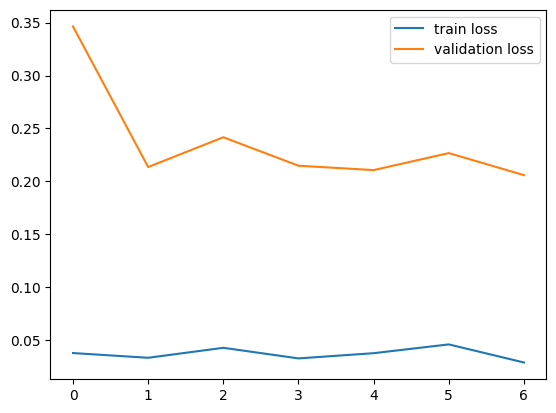

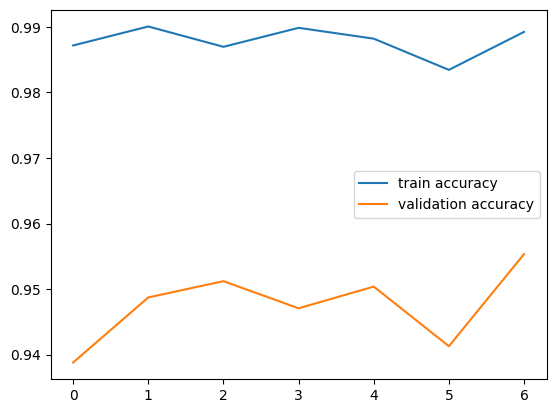

In [56]:
h = history

#plotting the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label= 'validation loss')
plt.legend()
plt.show()

#plotting the accuracy value
plt.plot(h.history['acc'], label= 'train accuracy')
plt.plot(h.history['val_acc'], label= 'validation accuracy')
plt.legend()
plt.show()

**Predictive system**

Path of the image to be predicted: /content/test without mask.jpg


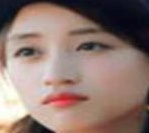

1/1 [==============================] - 0s 20ms/step
[[0.70477813 0.26551342]]
0
The person in the image is not wearing a mask


In [62]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/Test with mask.jpg


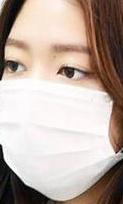

1/1 [==============================] - 0s 21ms/step
[[0.31123084 0.77115417]]
1
The person in the image is wearing a mask


In [63]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')